In [96]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [97]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [98]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [99]:
y_train.min(), y_train.max()

(0, 9)

In [100]:
y_train = y_train.reshape((1, 50000))[0]
y_test = y_test.reshape((1, 10000))[0]

In [101]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [102]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15, 2))
    plt.matshow(X[index])
    plt.xlabel(classes[y[index]])

<Figure size 1080x144 with 0 Axes>

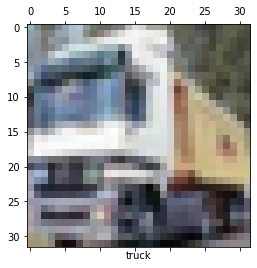

In [103]:
plot_sample(X_train, y_train, 1)

In [104]:
X_train = X_train / 255
X_test = X_test / 255

### ANN

In [105]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 82s 44ms/step - loss: 1.8108 - accuracy: 0.3526
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6237 - accuracy: 0.4254
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5419 - accuracy: 0.4560
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4825 - accuracy: 0.4758
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4327 - accuracy: 0.4939
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.3891 - accuracy: 0.5124
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.3524 - accuracy: 0.5267
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.3167 - accuracy: 0.5373
Epoch 9/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.2842 - accuracy: 0.5502
Epoch 10/10
1563/1563 [==============================] - 68s 43m

## Note:
#### sparse_cross_entropy_vs_cross_entropy
![sparse](sparse_cross_entropy_vs_cross_entropy.png)

In [106]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 1.3870 - accuracy: 0.5015


[1.3869818449020386, 0.5015000104904175]

In [107]:
y_pred = ann.predict(X_test)
y_pred = [np.argmax(ele) for ele in y_pred]


In [108]:
tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[442,  33,  69,  12,  16,  59,  20,  39, 300,  10],
       [ 24, 675,  12,  22,   2,  34,  12,  25, 150,  44],
       [ 45,  13, 398,  43, 105, 181,  58,  90,  62,   5],
       [ 12,  26,  69, 201,  38, 437,  82,  66,  52,  17],
       [ 29,  18, 141,  27, 420, 126,  70, 104,  65,   0],
       [ 11,  13,  69,  95,  46, 580,  42,  78,  59,   7],
       [  3,  21,  78,  49, 113, 141, 529,  31,  31,   4],
       [ 15,  27,  51,  29,  54, 128,  14, 633,  41,   8],
       [ 35,  52,  12,   7,  11,  33,   6,  14, 814,  16],
       [ 29, 266,  10,  30,  10,  55,  24,  65, 188, 323]])>

### CNN
![CNN](CNN.png)

In [109]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [110]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 37s 17ms/step - loss: 1.4692 - accuracy: 0.4724
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1261 - accuracy: 0.6048
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9912 - accuracy: 0.6561
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9014 - accuracy: 0.6867
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8386 - accuracy: 0.7077
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7785 - accuracy: 0.7302
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7315 - accuracy: 0.7466
Epoch 8/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6862 - accuracy: 0.7597
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.6425 - accuracy: 0.7741
Epoch 10/10
1563/1563 [==============================] - 26s 16m

In [111]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9401 - accuracy: 0.6958


[0.9401447176933289, 0.6958000063896179]

In [112]:
y_pred = cnn.predict(X_test)
y_pred = [np.argmax(ele) for ele in y_pred]


In [113]:
tf.math.confusion_matrix(labels=y_test, predictions=y_pred)


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[764,  21,  39,  18,  28,  10,   4,  15,  75,  26],
       [ 30, 846,   3,  11,   2,   7,   3,   4,  41,  53],
       [ 78,  10, 604,  83,  75,  68,  21,  43,  13,   5],
       [ 26,  13,  72, 563,  63, 158,  26,  42,  20,  17],
       [ 21,   6, 100,  92, 607,  35,  28,  92,  15,   4],
       [ 11,   6,  58, 192,  39, 598,   8,  69,  11,   8],
       [ 13,  12,  76, 135,  57,  28, 637,  14,  22,   6],
       [ 15,   4,  40,  41,  50,  52,   0, 779,   1,  18],
       [ 76,  26,  10,  12,   5,   8,   1,   9, 832,  21],
       [ 35, 124,  13,  16,   9,  10,   3,  20,  42, 728]])>